In [593]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import time

In [594]:
"Função para plotar o potencial -> x,y,V"

def plot2D(x, y, V, V_an):
    fig = plt.figure(figsize=(10, 10), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf1 = ax.plot_surface(X, Y, V_an[:], rstride=1, cstride=1, color='red',
            linewidth=1, antialiased=False, label='Resultado analítico')
    surf2 = ax.plot_wireframe(X, Y, V[:], rstride=1, cstride=1, color='cornflowerblue',
            linewidth=0.5, antialiased=False, label='Simulação computacional')
    surf1._facecolors2d=surf1._facecolors3d
    surf1._edgecolors2d=surf1._edgecolors3d
    #surf2._facecolors2d=surf2._facecolors3d
    #surf2._edgecolors2d=surf2._edgecolors3d    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$V$')
    ax.legend()
    plt.show();

In [595]:
"Plota as equipotenciais"
def plot_equip(x,y,V):
    fig = plt.contourf(x,y,V,20,cmap='magma')
    plt.rcParams['figure.figsize'] = (8,8)
    plt.colorbar()
    plt.title('Linhas equipotenciais do Potencial Elétrico')
    plt.xlabel("x")
    plt.ylabel("y")
    #plt.axes().set_aspect('equal')

In [596]:
"Calcula a equação de Laplace"
def laplace2d(V, x, nx ,ny, l1norm_target):
    l1norm = 10
    Vn = np.empty_like(V)
    contador = 0
    while l1norm > l1norm_target:
        Vn = V.copy()
        avg = np.roll(Vn,1,axis=0)+np.roll(Vn,-1,axis=0)+np.roll(Vn,1,axis=1)+np.roll(Vn,-1,axis=1)         
        V = avg/4
        
        V[:, 0] = 0  # V = 0 @ x = -1
        V[:, nx-1] = V[:,nx-2] # V = 0 @ x = 1
        V[0,:] = 0  # V = 0 @ y = -1
        V[ny-1,:] = np.sin(1.5*np.pi*x/x[nx-1])  # V = 0 @ y = 1
        
        l1norm = np.sqrt(np.sum((V - Vn)**2)/np.sum(Vn**2))
        #l1norm=numpy.max(numpy.absolute(pn - p))
        
        contador += 1 
    print("Iterações=",contador)
    return V

In [597]:
def V_analytical(x, y):
    X, Y = np.meshgrid(x,y)

    V_an = np.sinh(1.5*np.pi*Y / x[-1]) /\
    (np.sinh(1.5*np.pi*y[-1]/x[-1]))*np.sin(1.5*np.pi*X/x[-1])

    return V_an

In [598]:
"Definindo a rede"
nx = 101 #número de divisões em x
ny = 101 #número de divisões em y
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)

In [599]:
"Condições de contorno"
V = np.zeros((ny, nx))  # create a XxY vector of 0's
V[:, 0] = 0  # V = 0 @ x = -1
V[:, nx-1] = 0  # V = 0 @ x = 1
V[0,:] = 0  # V = 0 @ y = -1
V[ny-1,:] = np.sin(1.5*np.pi*x/x[nx-1])  # V = 0 @ y = 1

In [600]:
"Inicia o relógio"
t0 = time.process_time()

In [602]:
"Termina o relógio e conta"
t1 = time.process_time()
dt = t1 - t0
print('Tempo =', dt)

Tempo = 0.022072999999977583


In [605]:
V = laplace2d(V, x, nx ,ny, 1e-4)

Iterações= 1731


In [606]:
V_an = V_analytical(x, y)

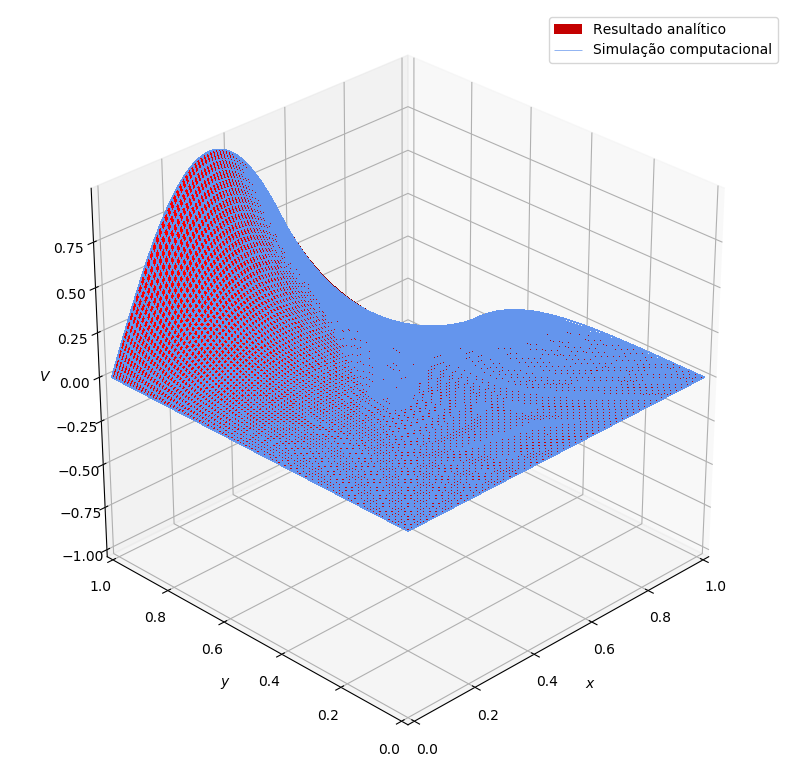

In [607]:
plot2D(x, y, V, V_an)

In [608]:
data = np.loadtxt('ex5.txt')
h = data[:,0]
dif = data[:,1]

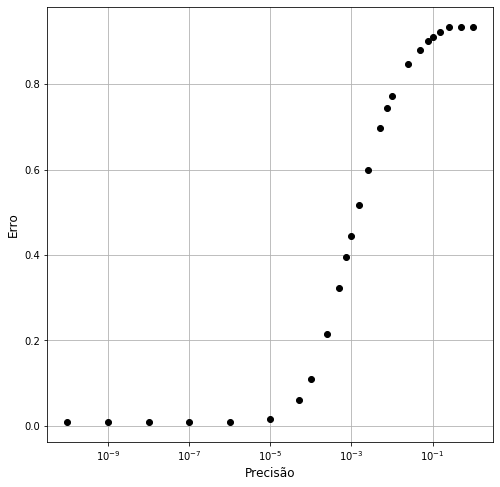

In [612]:
plt.plot(h, dif, 'ko')
plt.xscale('log')
plt.xlabel("Precisão", fontsize=12)
plt.ylabel("Erro", fontsize=12)
plt.grid()
plt.savefig('erro_acucaria.png')